In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [141]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [142]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [143]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [144]:
pd.set_option('display.max_rows',None)

In [145]:
df.shape

(4177, 9)

In [146]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

We have 4177 rows and 9 columns including the target column

In [147]:
#Statistical Summary
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [148]:
#Checking the null values in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

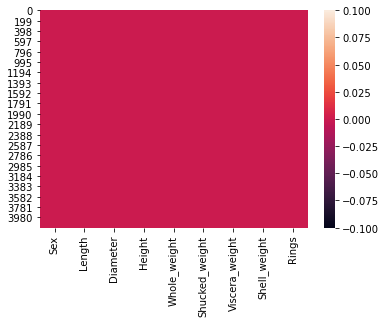

In [149]:
sns.heatmap(df.isnull())

There is no null values in the dataset

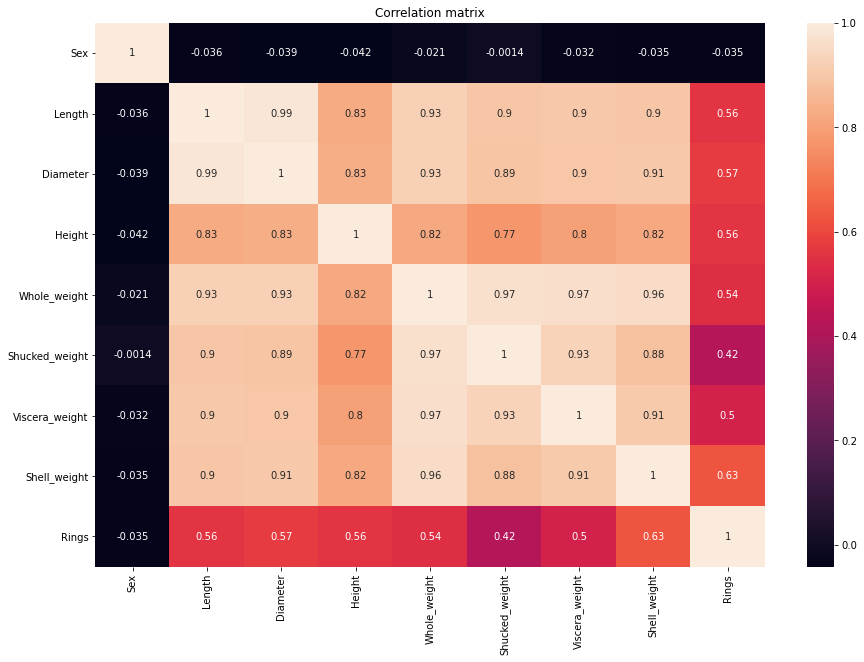

In [150]:
corr_mat=df.corr()#Multivariate analysis
plt.figure(figsize=[15,10])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation matrix')
plt.show()


Sex column is negatively correlated with all the other columns.

In [151]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

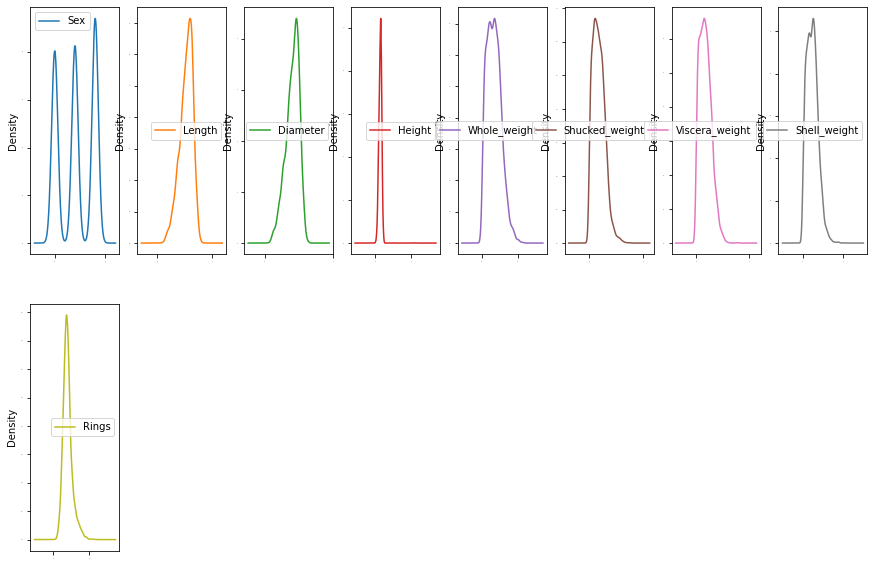

In [152]:
#Example of multivariate analysis
df.plot(kind='density',subplots=True,layout=(2,8),sharex=False,fontsize=1,figsize=(15,10))
plt.show()

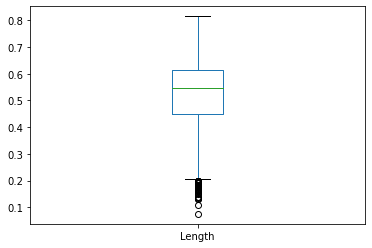

In [153]:
#Boxplots(Checking outliers)
df['Length'].plot.box()

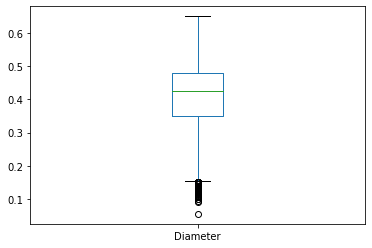

In [154]:
df['Diameter'].plot.box()

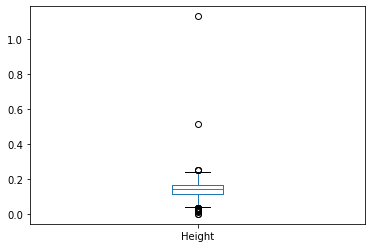

In [155]:
df['Height'].plot.box()

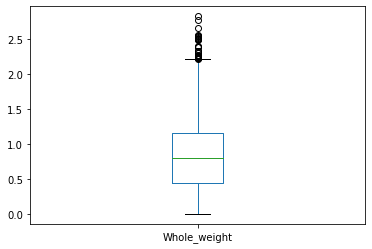

In [156]:
df['Whole_weight'].plot.box()

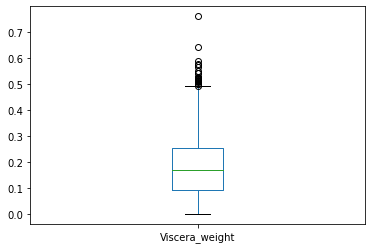

In [157]:
df['Viscera_weight'].plot.box()


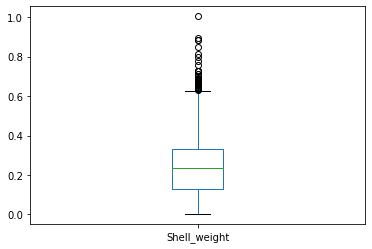

In [158]:
df['Shell_weight'].plot.box()

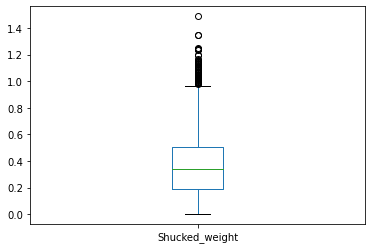

In [159]:
df['Shucked_weight'].plot.box()

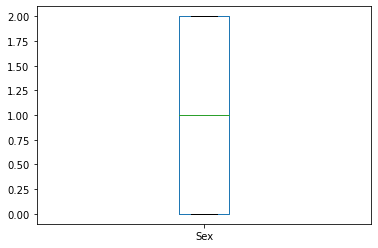

In [160]:
df['Sex'].plot.box()

In [161]:
#Removing outliers
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [162]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [163]:
z[6][8]

3.12251641377204

In [164]:
z[4148][6]

3.151485732766359

In [165]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (4177, 9)
shape after removing the outliers: (4027, 9)


In [166]:
#%data loss calculation
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


3.6% data is lost after removing the outliers

In [167]:
df=dfnew

In [168]:
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole_weight      0.334204
Shucked_weight    0.458295
Viscera_weight    0.437116
Shell_weight      0.349471
Rings             0.725464
dtype: float64

In [169]:
#Splitting the independent and target variable in x and y
x=df.drop('Rings',axis=1)
y=df['Rings']

In [170]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [171]:
df_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole_weight     -0.016797
Shucked_weight    0.021815
Viscera_weight    0.035902
Shell_weight      0.016660
dtype: float64

Skewness is removed using power transform function

In [172]:
df=df_new

In [173]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.134329,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,1.134329,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-1.313068,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,1.134329,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926


In [174]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [175]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predrf=svc.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.30355665839536805 on Random_state 56


In [176]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=56)

In [177]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.30355665839536805
[[ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  8  6  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  5 19 47  9  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3 57 33 12  7  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 38 70 56 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 20 58 93 51  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 17 59 82 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 18 21 58 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 24 28  9  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  5 16 26  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  9 11  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 12  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 11  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5 10  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  4  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.36      0.48      0.41        29


In [178]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.19437551695616212
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 13  7  2  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 13 26 21  9  5  2  4  3  0  1  0  0  0  0  0]
 [ 0  2  2 19 37 21 18  8  5  0  0  1  1  1  0  0  0]
 [ 0  0  3 14 34 37 36 32 14  5  4  5  0  1  1  1  0]
 [ 0  0  0  6 16 44 49 41 25 18 10  4  7  6  0  0  0]
 [ 0  0  0  3  5 18 46 35 30 16 11  7  3  1  0  2  0]
 [ 0  0  0  0  6 13 19 33 18 16  7  7  4  6  2  0  1]
 [ 0  0  0  1  3  6 15 13 11  7  4  1  2  1  2  2  2]
 [ 0  0  0  0  2  4  9  7  9  9  5  3  2  2  1  1  2]
 [ 0  0  0  0  1  4  2  4  4  5  2  2  3  2  0  1  0]
 [ 0  0  0  0  0  1  4  5  6  3  2  0  4  2  0  0  1]
 [ 0  0  0  1  0  1  2  5  2  2  2  0  2  0  1  1  1]
 [ 0  0  0  0  0  1  4  1  2  4  2  1  2  0  1  0  2]
 [ 0  0  0  0  0  0  1  0  2  2  1  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  2  2  1  2  2  0  1  0  0  0]]
              precision    recall  f1-score   support

      

In [187]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.2729528535980149
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10 10  4  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 26 39  6  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  3 23 42 30  9  7  0  1  0  0  0  0  0  0  0]
 [ 0  0  3 12 34 54 49 25  5  2  3  0  0  0  0  0  0]
 [ 0  0  0  5 18 50 74 44 24  8  2  1  0  0  0  0  0]
 [ 0  0  0  1  6 16 41 68 27  9  5  1  1  2  0  0  0]
 [ 0  0  0  0  5  7 21 45 38  6  8  0  0  1  0  1  0]
 [ 0  0  0  0  2  4 18 20  9  6  5  1  2  2  0  0  1]
 [ 0  0  0  1  3  2  5 14 13 11  3  2  0  1  0  0  1]
 [ 0  0  0  0  2  2  4  7  5  3  2  3  1  1  0  0  0]
 [ 0  0  0  0  0  1  9  3  5  3  4  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  6  6  1  3  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  1  0  6  3  4  1  3  0  1  0  0]
 [ 0  0  0  0  0  0  1  2  1  1  1  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  1  3  3  1  3  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [188]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)
print(scr.mean())

0.2719183761540003


In [189]:
scr=cross_val_score(dtc,x,y,cv=5)
print(scr.mean())

0.20562150332136309


In [190]:
scr=cross_val_score(rf,x,y,cv=5)
print(scr.mean())

0.256278840374212


The best model is Random Forest Classifier because the difference between accuracy score and cross val score is minimum(27-26=1).

In [191]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [194]:
#Creating parameters list to pass in GridSearchCV
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.23953806230553143


The model's accuracy is 24%

In [195]:
import joblib
joblib.dump(gd_sr.best_score_,'Abalone.obj')

['Abalone.obj']